# Prosper Loan Data Exploration
## by So Jung Kang 

## Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),current loan status, borrower income, and many others. You could find the original data from [here]( https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv). Since there are too many variables, we will select only necessary variables later.

In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [283]:
data = pd.read_csv('../Downloads/prosperLoanData.csv')
data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [284]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [285]:
data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [286]:
data.shape # 113,937 rows, 81 columns

(113937, 81)

In [410]:
#Take only the interesting columns
loans = data.loc[:,('ListingCreationDate',
                      'DateCreditPulled',
                      'Term',
                      'LoanStatus',
                      'BorrowerAPR',              
                      'BorrowerRate',
                      'LenderYield',
                      'ProsperRating (Alpha)',
                      'ProsperScore',
                      'ListingCategory (numeric)',
                      'BorrowerState',
                      'Occupation',
                      'EmploymentStatus',
                      'IsBorrowerHomeowner',
                      'DebtToIncomeRatio',
                      'IncomeRange',
                      'IncomeVerifiable',
                      'StatedMonthlyIncome',
                      'LoanMonthsSinceOrigination',
                      'LoanOriginalAmount',
                      'LoanOriginationDate',
                      'MonthlyLoanPayment') ]

Prosper Dataset's Variables:
- <b>ListingCreationDate</b>: The date the listing was created
- <b>DateCreditPulled</b>: The date the credit profile was pulled
- <b>Term</b>: The length of the loan expressed in months
- <b>LoanStatus</b>: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket
- <b>BorrowerAPR</b>: The Borrower's Annual Percentage Rate (APR) for the loan             
- <b>BorrowerRate</b>: The Borrower's interest rate for this loan
- <b>LenderYield</b>: The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee
- <b>ProsperRating (Alpha)</b>: The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009
- <b>ProsperScore</b>: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009
- <b>ListingCategory (numeric)</b>: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
- <b>BorrowerState</b>: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created 
- <b>Occupation</b>: The Occupation selected by the Borrower at the time they created the listing
- <b>EmploymentStatus</b>: The employment status of the borrower at the time they posted the listing
- <b>IsBorrowerHomeowner</b>: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner
- <b>DebtToIncomeRatio</b>: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%)
- <b>IncomeRange</b>: The income range of the borrower at the time the listing was created
- <b>IncomeVerifiable</b>: The borrower indicated they have the required documentation to support their income
- <b>StatedMonthlyIncome:</b> The monthly income the borrower stated at the time the listing was created
- <b>LoanMonthsSinceOrigination</b>: Number of months since the loan originated
- <b>LoanOriginalAmount</b>: The origination amount of the loan
- <b>LoanOriginationDate</b>: The date the loan was originated
- <b>LoanOriginationQuarter</b>: The quarter in which the loan was originated
- <b>MonthlyLoanPayment</b>: The scheduled monthly loan payment

In [411]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
ListingCreationDate           113937 non-null object
DateCreditPulled              113937 non-null object
Term                          113937 non-null int64
LoanStatus                    113937 non-null object
BorrowerAPR                   113912 non-null float64
BorrowerRate                  113937 non-null float64
LenderYield                   113937 non-null float64
ProsperRating (Alpha)         84853 non-null object
ProsperScore                  84853 non-null float64
ListingCategory (numeric)     113937 non-null int64
BorrowerState                 108422 non-null object
Occupation                    110349 non-null object
EmploymentStatus              111682 non-null object
IsBorrowerHomeowner           113937 non-null bool
DebtToIncomeRatio             105383 non-null float64
IncomeRange                   113937 non-null object
IncomeVerifiable              113937 non-n

In [412]:
# Count total NaN at each column in a DataFrame 
print(" \nCount total NaN at each column in a DataFrame : \n\n", 
      loans.isnull().sum()) 

 
Count total NaN at each column in a DataFrame : 

 ListingCreationDate               0
DateCreditPulled                  0
Term                              0
LoanStatus                        0
BorrowerAPR                      25
BorrowerRate                      0
LenderYield                       0
ProsperRating (Alpha)         29084
ProsperScore                  29084
ListingCategory (numeric)         0
BorrowerState                  5515
Occupation                     3588
EmploymentStatus               2255
IsBorrowerHomeowner               0
DebtToIncomeRatio              8554
IncomeRange                       0
IncomeVerifiable                  0
StatedMonthlyIncome               0
LoanMonthsSinceOrigination        0
LoanOriginalAmount                0
LoanOriginationDate               0
MonthlyLoanPayment                0
dtype: int64


From the work above, we can make the following observations:

- The dataset contains 22 columns, most of which are numerical types.
- Some columns have null values, but none have more than ~30% null values. 
- The column names use camelcase instead of Python's preferred snakecase, which means we can't just replace spaces with underscores. We will convert the column names from camelcase to snakecase and reword some of the column names based on the data dictionary to be more descriptive.

In [414]:
#change column names in snakecase 
loans.rename({'ListingCreationDate':'listing_date',
              'DateCreditPulled':'credit_pulled_date',
              'Term':'term',
              'LoanStatus':'loan_status',
              'BorrowerAPR':'borrower_APR',              
              'BorrowerRate':'borrower_rate',
              'LenderYield':'lender_yield',
              'ProsperRating (Alpha)':'prosper_rating',
              'ProsperScore':'prosper_score',
              'ListingCategory (numeric)':'listing_category',
              'BorrowerState':'borrower_state',
              'Occupation':'occupation',
              'EmploymentStatus':'employment_status',
              'IsBorrowerHomeowner':'is_borrower_homeowner',
              'DebtToIncomeRatio':'debt_to_income_ratio',
              'IncomeRange':'income_range',
              'IncomeVerifiable':'income_verifiable',
              'StatedMonthlyIncome':'monthly_income',
              'LoanCurrentDaysDelinquent':'days_deliquent',
              'LoanMonthsSinceOrigination':'loan_months_originated',
              'LoanOriginalAmount':'loan_amount_originated',
              'LoanOriginationDate':'loan_date_originated',
              'MonthlyLoanPayment':'monthly_loan_payment'}, axis=1, inplace=True)

Change object type to datetime type; listing_date, credit_pulled_date, loan_date_originated

In [415]:
#Make a copy of the dataframe
df_loans = loans.copy()

#Change object type to datetime 
df_loans.listing_date = pd.to_datetime(df_loans.listing_date) 
df_loans.credit_pulled_date = pd.to_datetime(df_loans.credit_pulled_date)
df_loans.loan_date_originated = pd.to_datetime(df_loans.loan_date_originated)

df_loans.head()

,listing_date,credit_pulled_date,term,loan_status,borrower_APR,borrower_rate,lender_yield,prosper_rating,prosper_score,listing_category,...,employment_status,is_borrower_homeowner,debt_to_income_ratio,income_range,income_verifiable,monthly_income,loan_months_originated,loan_amount_originated,loan_date_originated,monthly_loan_payment
0,2007-08-26 19:09:29.263,2007-08-26 18:41:46.780,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,0,...,Self-employed,True,0.17,"$25,000-49,999",True,3083.333333,78,9425,2007-09-12,330.43
1,2014-02-27 08:28:07.900,2014-02-27 08:28:14.000,36,Current,0.12016,0.0920,0.0820,A,7.0,2,...,Employed,False,0.18,"$50,000-74,999",True,6125.000000,0,10000,2014-03-03,318.93
2,2007-01-05 15:00:47.090,2007-01-02 14:09:10.060,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,0,...,Not available,False,0.06,Not displayed,True,2083.333333,86,3001,2007-01-17,123.32
3,2012-10-22 11:02:35.010,2012-10-22 11:02:32.000,36,Current,0.12528,0.0974,0.0874,A,9.0,16,...,Employed,True,0.15,"$25,000-49,999",True,2875.000000,16,10000,2012-11-01,321.45
4,2013-09-14 18:38:39.097,2013-09-14 18:38:44.000,36,Current,0.24614,0.2085,0.1985,D,4.0,2,...,Employed,True,0.26,"$100,000+",True,9583.333333,6,15000,2013-09-20,563.97


In [416]:
# Convert prosper_rating and income_range to ordinal categorical 
ordinal_dict = {'prosper_rating': ['N/A','HR','E','D','C', 'B', 'A', 'AA'],\
                    'income_range':['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']}

for row in ordinal_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_dict[row])
    df_loans[row] = df_loans[row].astype(ordered_var)


In [417]:
#Replace listing category number by name
listing_name = {0:  'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3 : 'Business', 4 : 'Personal Loan',\
                5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure',\
                11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 14 : 'Large Purchases',\
                15 : 'Medical/Dental', 16 : 'Motorcycle', 17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loans['listing_category'] = df_loans['listing_category'].map(listing_name)

In [418]:
#Change datatype to categorical type
df_loans.occupation = df_loans.occupation.astype('category')
df_loans.borrower_state = df_loans.borrower_state.astype('category')
df_loans.loan_status = df_loans.loan_status.astype('category')
df_loans.listing_category = df_loans.listing_category.astype('category')
df_loans.employment_status = df_loans.employment_status.astype('category')

In [419]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 22 columns):
listing_date              113937 non-null datetime64[ns]
credit_pulled_date        113937 non-null datetime64[ns]
term                      113937 non-null int64
loan_status               113937 non-null category
borrower_APR              113912 non-null float64
borrower_rate             113937 non-null float64
lender_yield              113937 non-null float64
prosper_rating            84853 non-null category
prosper_score             84853 non-null float64
listing_category          113937 non-null category
borrower_state            108422 non-null category
occupation                110349 non-null category
employment_status         111682 non-null category
is_borrower_homeowner     113937 non-null bool
debt_to_income_ratio      105383 non-null float64
income_range              105390 non-null category
income_verifiable         113937 non-null bool
monthly_income            11

In [420]:
df_loans.describe()

,term,borrower_APR,borrower_rate,lender_yield,prosper_score,debt_to_income_ratio,monthly_income,loan_months_originated,loan_amount_originated,monthly_loan_payment
count,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,105383.000000,1.139370e+05,113937.000000,113937.00000,113937.000000
mean,40.830248,0.218828,0.192764,0.182701,5.950067,0.275947,5.608026e+03,31.896882,8337.01385,272.475783
std,10.436212,0.080364,0.074818,0.074516,2.376501,0.551759,7.478497e+03,29.974184,6245.80058,192.697812
min,12.000000,0.006530,0.000000,-0.010000,1.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000
25%,36.000000,0.156290,0.134000,0.124200,4.000000,0.140000,3.200333e+03,6.000000,4000.00000,131.620000
50%,36.000000,0.209760,0.184000,0.173000,6.000000,0.220000,4.666667e+03,21.000000,6500.00000,217.740000
75%,36.000000,0.283810,0.250000,0.240000,8.000000,0.320000,6.825000e+03,65.000000,12000.00000,371.580000
max,60.000000,0.512290,0.497500,0.492500,11.000000,10.010000,1.750003e+06,100.000000,35000.00000,2251.510000


In [421]:
df_loans.shape

(113937, 22)

### What is the structure of your dataset?

> After cleaning the dataset, there are 113,937 rows with 22 specifications. Out of 29 specifications, 10 are numerical, 3 are datetime, 7 are category type, 2 are boolean.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in what is the profile of the borrowers - their income range, job, etc. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that people can earn better interest rates based on person's financial status or the amount of loan, or what kinds of types of the loan(less risky). 

## Univariate Exploration

### Numerical types

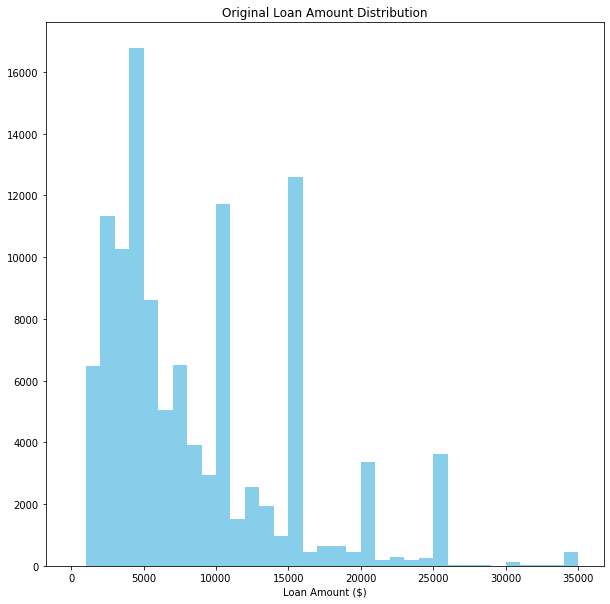

In [422]:
# Amount of loan distribution
binsize = 1000
bins = np.arange(0, df_loans['loan_amount_originated'].max()+binsize, binsize)

plt.figure(figsize=[10, 10])
plt.hist(data = df_loans, x = 'loan_amount_originated', bins = bins, color = "skyblue")
plt.xlabel('Loan Amount ($)')
plt.title('Original Loan Amount Distribution')
plt.show()

Comment: Since it's a right skewed long tail distribution, it's hard to see the trend. To be clear, I will put it on a log scale.

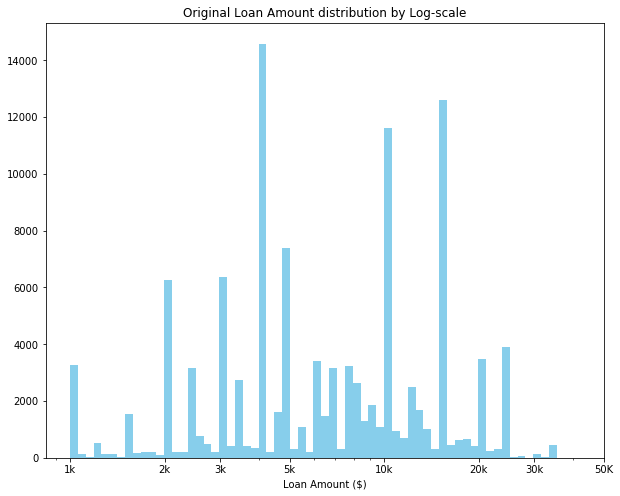

In [423]:
# Log-scale loan amount distribution
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(df_loans['loan_amount_originated'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'loan_amount_originated', bins = bins, color = "skyblue")
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['1k', '2k','3k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Amount ($)')
plt.title('Original Loan Amount distribution by Log-scale')
plt.show()

Comment: There is a peak between \\$4,000 and \\$18,000

In [424]:
#Terms of loans
df_loans.term.value_counts()

36    87778
60    24545
12     1614
Name: term, dtype: int64

Comment: There are three types of loan terms; 1 year, 3 years and 5 years. Mostly people choose 3 years term loans. 

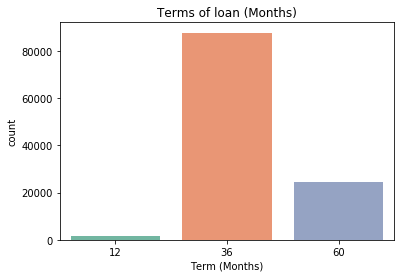

In [425]:
sns.countplot(data=df_loans,x= 'term', palette = "Set2");
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

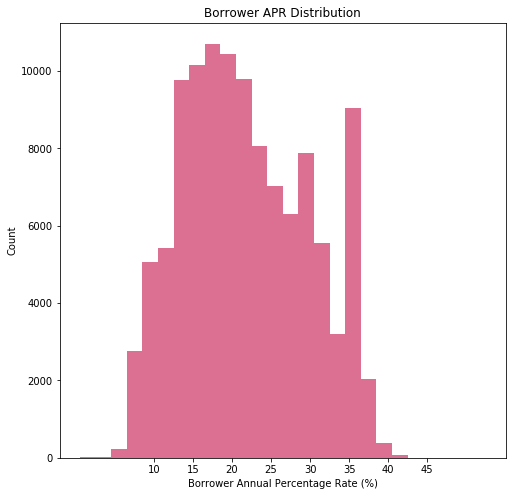

In [427]:
# Borrower APR Distribution
binsize = 2
borroweAPRPct = df_loans['borrower_APR']*100
bins = np.arange(0.5, df_loans['borrower_APR'].max()*100+binsize, binsize)

plt.figure(figsize=[8, 8])
plt.hist(x = borroweAPRPct, bins = bins, color='palevioletred')
plt.xlabel('Borrower Annual Percentage Rate (%)')
plt.ylabel('Count')
plt.xticks([10, 15, 20, 25, 30, 35, 40, 45], ['10', '15', '20', '25', '30', '35', '40', '45'])
plt.title('Borrower APR Distribution')
plt.show()

Comment: It seems like Borrower APR are almost normally distributed.

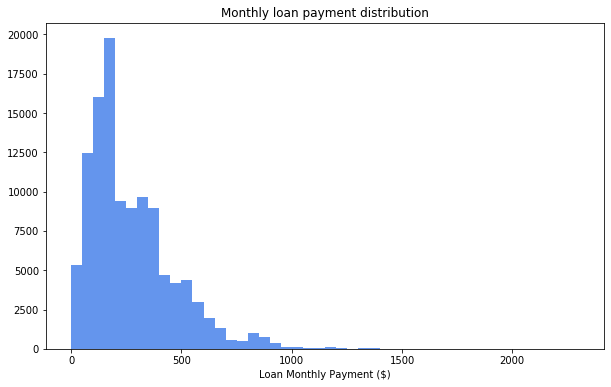

In [428]:
# Monthly loan payment distribution
binsize = 50
bins = np.arange(0, df_loans['monthly_loan_payment'].max()+binsize, binsize)

plt.figure(figsize=[10, 6])
plt.hist(data = df_loans, x = 'monthly_loan_payment', bins = bins, color='cornflowerblue')
plt.xlabel('Loan Monthly Payment ($)')
plt.title('Monthly loan payment distribution')
plt.show()

Comment: It's a right-skewed long tail distribution. I will put this on a log scale as well. 

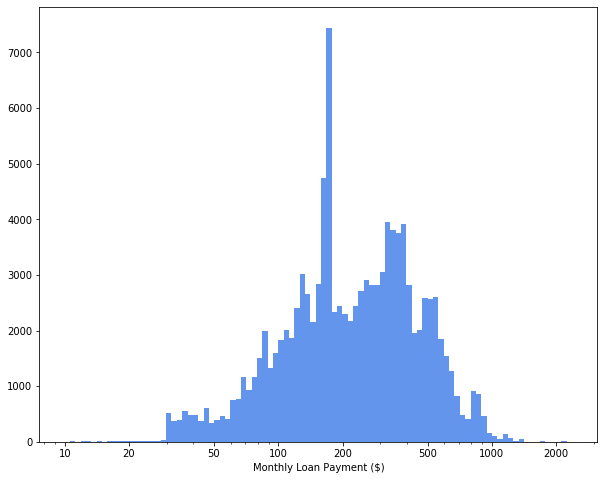

In [429]:
# Using log-scale
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df_loans['monthly_loan_payment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df_loans, x = 'monthly_loan_payment', bins = bins, color='cornflowerblue')
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1e3, 2e3], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.show()

Comment: We can find that the peak of monthly loan payment is between \\$100 and \\$200.

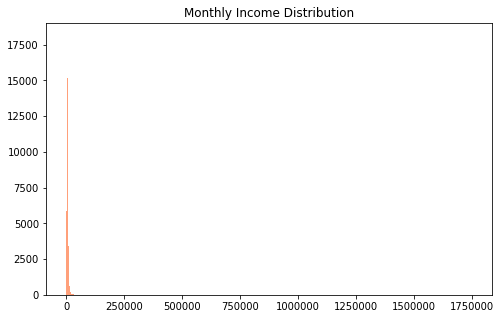

In [430]:
# Monthly income distribution
binsize = 1000
bins = np.arange(0, df_loans['monthly_income'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'monthly_income', bins = bins, color='lightsalmon')
plt.title('Monthly Income Distribution')
plt.show()

Comment: It's difficult to see the trend due to high right-skewed distribution the far outliers above the 1000,000. Thus, I will change to log-scale and exclude the outliers by limiting the x-axis to //$50,000.

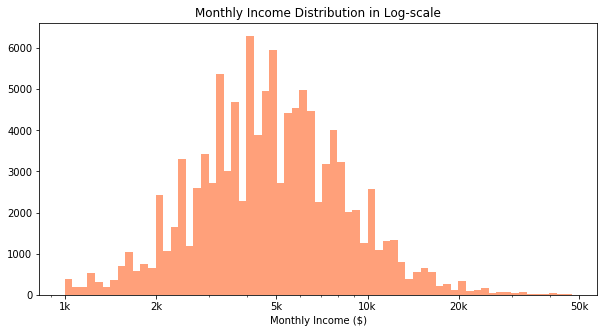

In [431]:
# Monthly income distribution by log-scale
log_binsize = 0.025
bins = 10 ** np.arange(3, 4.7, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'monthly_income', bins = bins, color='lightsalmon')
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k','5k', '10k', '20k', '50k'])
plt.xlabel('Monthly Income ($)')
plt.title('Monthly Income Distribution in Log-scale')
plt.show()

Comment: We can find that monthly income distribution is close to normal distribution of income. The peak is between \\$2,000 and \\$5,000.

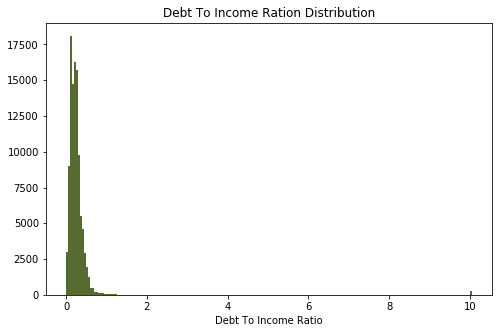

In [315]:
#Debt to Income Ration Distribution
binsize = 0.05
bins = np.arange(0, df_loans['debt_to_income_ratio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'debt_to_income_ratio', bins = bins, color='darkolivegreen')
plt.xlabel('Debt To Income Ratio')
plt.title('Debt To Income Ration Distribution')
plt.show()

In [318]:
df_loans['debt_to_income_ratio'].value_counts()

0.18000    4132
0.22000    3687
0.17000    3616
0.14000    3553
0.20000    3481
           ... 
0.13774       1
0.04983       1
0.15248       1
0.19893       1
0.06056       1
Name: debt_to_income_ratio, Length: 1207, dtype: int64

Comment: We can see Debt_to_income_ratio ranges from 0 to 10, however most values lie between 0.14 and 0.33. Thus,we will consider all above 1 are outliers and change the distribution in log-scale without the outliers. 

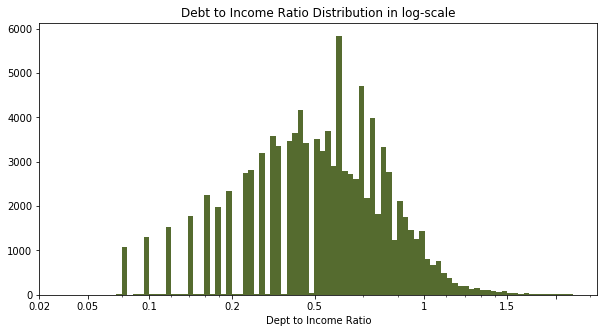

In [321]:
#Debt to Income Ratio Distribution in log scale
log_binsize = 0.02
bins = 10 ** np.arange(-1.5, 0.25, log_binsize)
plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'debt_to_income_ratio', bins = bins, color='darkolivegreen')
plt.xscale('log')
plt.xticks([2e-2, 3e-2, 5e-2, 1e-1, 2e-1, 5e-1, 1, 1.5], ['0.02', '0.05', '0.1', '0.2', '0.5', '1', '1.5'])
plt.xlabel('Dept to Income Ratio')
plt.title('Debt to Income Ratio Distribution in log-scale')

plt.show()

Comment: We can see the log-scale distributio is almost normally distributed around 50%. 

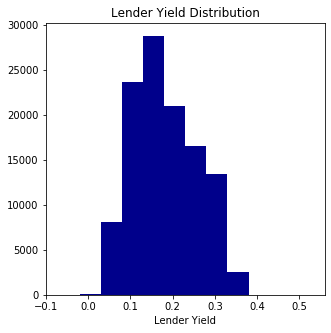

In [322]:
#Lender Yield Distribution
binsize = 0.05
bins = np.arange(-.07, df_loans['lender_yield'].max()+binsize, binsize)

plt.figure(figsize=[5, 5])
plt.hist(data = df_loans, x = 'lender_yield', bins = bins, color='darkblue')
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution')

plt.show()

CommentL: To see the distribution of Lender Yield more specific, we will use log-scale as well.

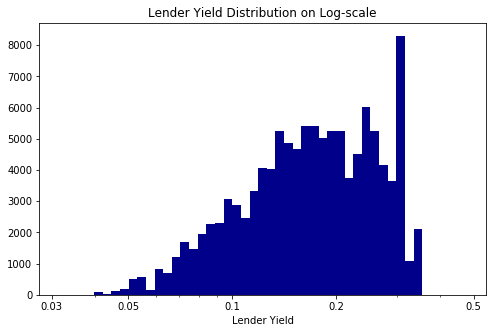

In [323]:
#Lender Yield Distribution with log scale 
log_binsize = 0.025
bins = 10 ** np.arange(-1.5, -0.3, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'lender_yield', bins = bins, color='darkblue')
plt.xscale('log')
plt.xticks([3e-2, 5e-2, 1e-1, 2e-1, 5e-1], ['0.03', '0.05', '0.1', '0.2', '0.5'])
plt.xlabel('Lender Yield')
plt.title('Lender Yield Distribution on Log-scale')

plt.show()

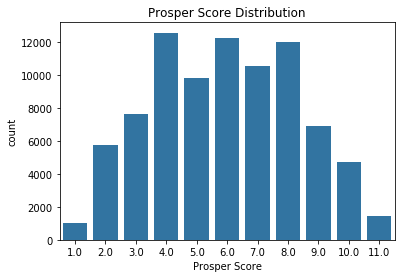

In [199]:
#Prosper Score Distribution
base_color = sb.color_palette()[0]
sb.countplot(data=df_loans,x= 'prosper_score',color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

Comment: 4, 6 and 8 are the most common prosper scores.

##### Categorical Columns

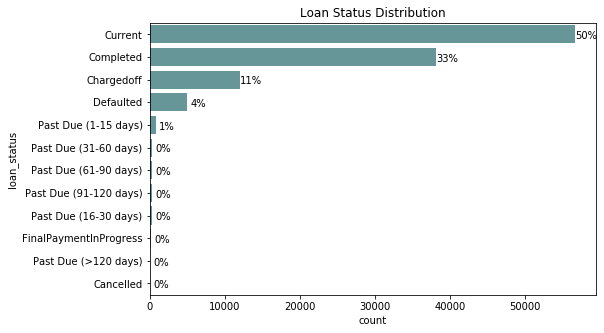

In [432]:
# Loan Status Distribution
status = df_loans['loan_status'].value_counts().index

plt.figure(figsize=[8, 5])
sns.countplot(data=df_loans,y='loan_status',color='cadetblue',order=status);
plt.title('Loan Status Distribution')

# add annotations
num_points = df_loans.shape[0]
cat_counts = df_loans['loan_status'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1500, loc+0.2,  pct_string, ha = 'center', color = 'black');

Comment: Half of the Loan status is current and 33% is paied off. 

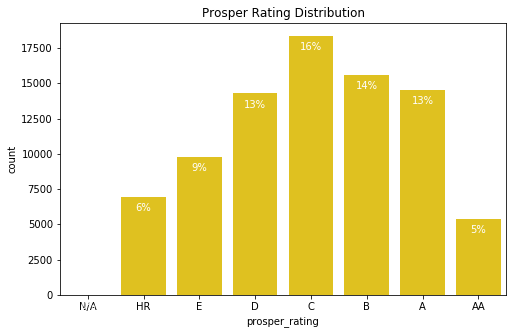

In [433]:
# Prosper Rating Distribution

plt.figure(figsize=[8, 5])
sns.countplot(data=df_loans,x='prosper_rating',color='gold');
plt.title('Prosper Rating Distribution')

# add annotations
num_points = df_loans[df_loans.prosper_rating.isna() == False].shape[0]
cat_counts = df_loans['prosper_rating'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc,  count-1000, pct_string, ha = 'center', color = 'w');

Comment: 16% of people have C prosper rating, followed by B prosper rating(14%). 

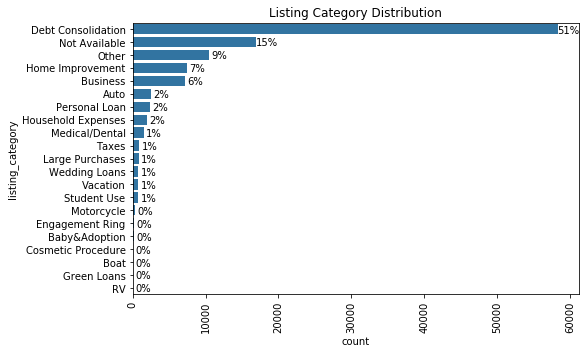

In [434]:
#Listing Category Distrobution
cat_order = df_loans.listing_category.value_counts().index
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loans,y='listing_category',color=base_color, order=cat_order);
plt.title('Listing Category Distribution')
plt.xticks(rotation=90)

# add annotations
num_points = df_loans.shape[0]
cat_counts = df_loans['listing_category'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1400, loc+0.3,  pct_string, ha = 'center', color = 'black');

Comment: More than half of people take loans to pay off other loans.

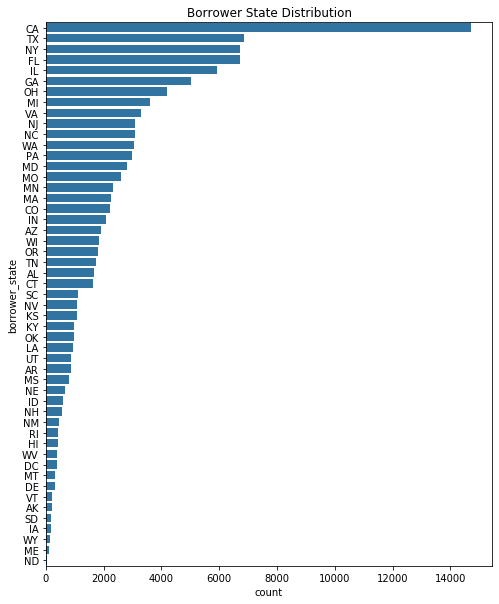

In [350]:
#Borrower State Distrobution
cat_order = df_loans.borrower_state.value_counts().index
plt.figure(figsize=[8, 10])
sns.countplot(data=df_loans,y='borrower_state',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');

Comment: States California, Texas and New York have the 3 biggest numbers of loans originated the most.

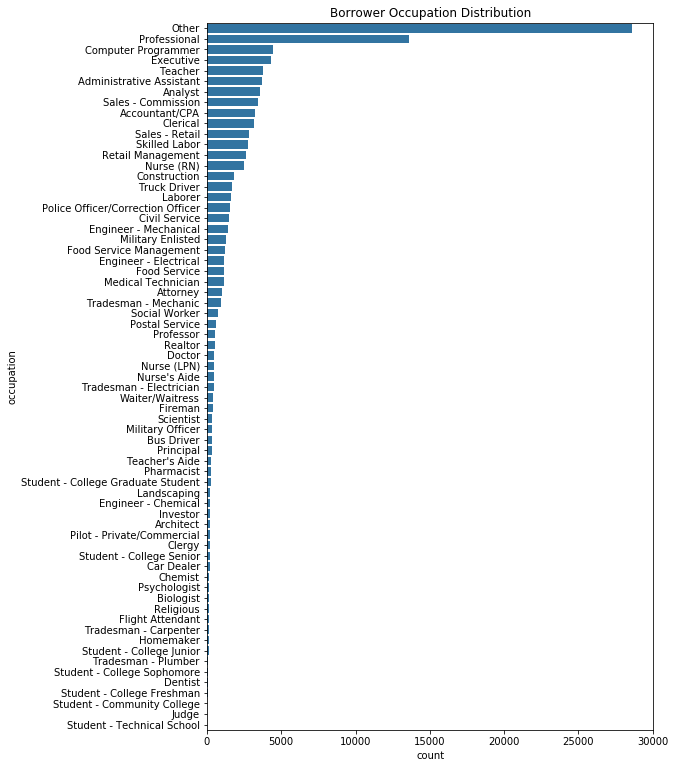

In [349]:
#Borrower Occupation Distribution
cat_order = df_loans.occupation.value_counts().index
plt.figure(figsize=[8, 13])
sns.countplot(data=df_loans,y='occupation',color=base_color, order=cat_order);
plt.title('Borrower Occupation Distribution');

Comment: Most borrowers' occupations, excluding Other group, are: Professional, Computer Engineer and Executive, while, Students, Judges, Dentists and Biologists are taking loans the least. 

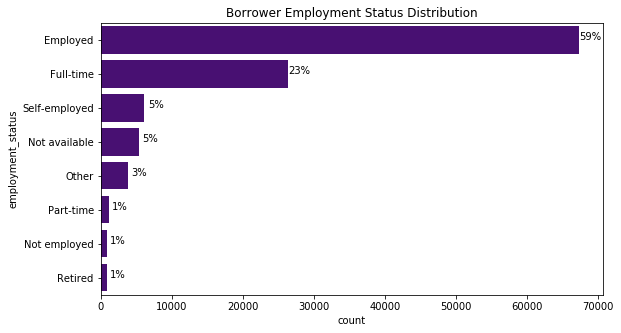

In [354]:
#Borrower Employment Status Distrobution
cat_order = df_loans.employment_status.value_counts().index
plt.figure(figsize=[9, 5])
sns.countplot(data=df_loans,y='employment_status',color='indigo', order=cat_order);
plt.title('Borrower Employment Status Distribution')

# add annotations
n_points = df_loans.shape[0]
cat_counts = df_loans['employment_status'].value_counts()
locs, labels = plt.yticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.0f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(count+1600, loc,  pct_string, ha = 'center', color = 'black');

Comment: Like we assumed before, most of the borrowers are employed. Only 2% of borrowers do not have jobs 

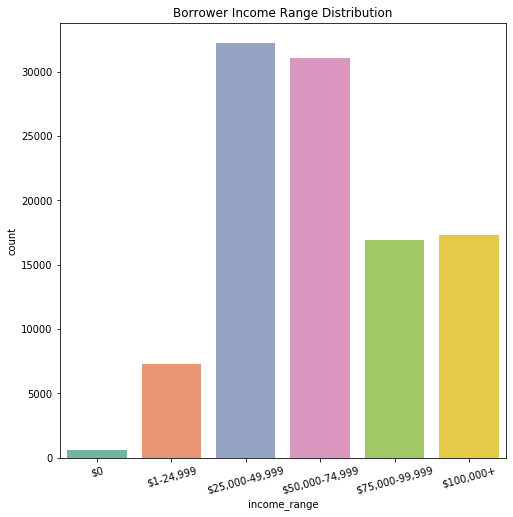

In [355]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[8, 8])
sb.countplot(data=df_loans,x='income_range',palette = "Set2");
plt.title('Borrower Income Range Distribution')
plt.xticks(rotation=15);

Comment: The most common yearly income range is $25,000-49,999 from borrowers.

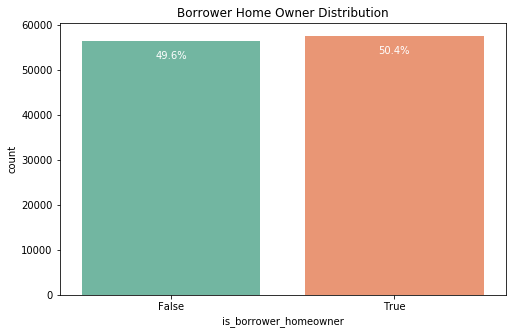

In [357]:
#Is Borrower-Homeowner Status Distrobution
plt.figure(figsize=[8, 5])

def str_to_bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sb.color_palette()[0]
sns.countplot(data = df_loans, x = 'is_borrower_homeowner', palette = "Set2")

# add annotations
n_points = df_loans.shape[0]
cat_counts = df_loans['is_borrower_homeowner'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str_to_bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

plt.title('Borrower Home Owner Distribution');

Comment: Owning house does not affect to take loans.

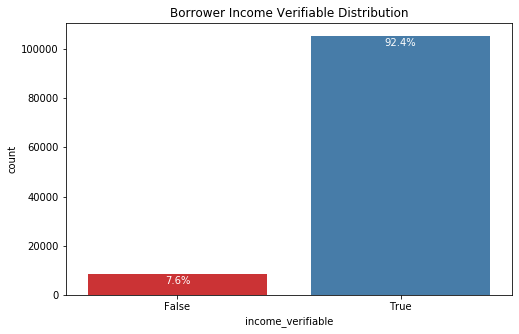

In [359]:
#Is Income-Verifiable Status Distrobution
plt.figure(figsize=[8, 5])

def str_to_bool(v):
    return str(v).lower() in ("yes", "true", "True", "1")

base_color = sb.color_palette()[0]
sns.countplot(data = df_loans, x = 'income_verifiable', palette = "Set1")

# add annotations
num_points = df_loans.shape[0]
cat_counts = df_loans['income_verifiable'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[str_to_bool(label.get_text())]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    # print the annotation just below the top of the bar
    plt.text(loc, count-4000, pct_string, ha = 'center', color = 'w')

plt.title('Borrower Income Verifiable Distribution');

Comment: Almost all borrowers have verifiable income, which we can assume that it is required to provide documentation to verify their income. 

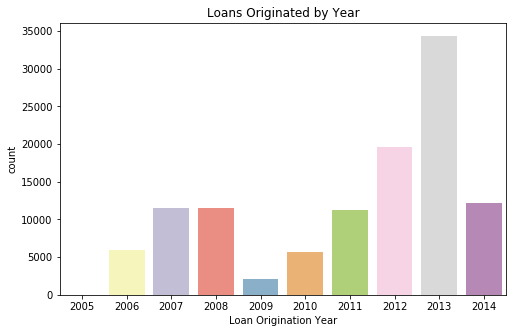

In [360]:
# Loan Origination by Year
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loans,x=df_loans['loan_date_originated'].dt.year,palette = "Set3")
plt.title('Loans Originated by Year')
plt.xlabel('Loan Origination Year');

Comment: We can tell there's sharp drop after 2008, since financial crisis. In 2013, loans were originated the most. 

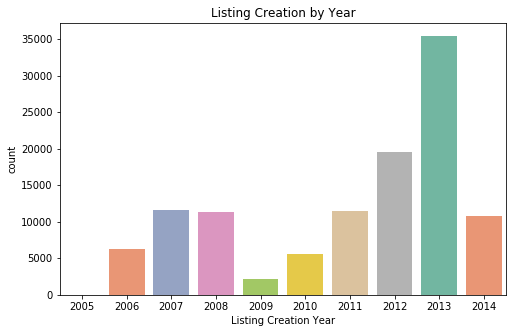

In [363]:
# Listing Creation by Year
plt.figure(figsize=[8, 5])
sns.countplot(data=df_loans,x=df_loans['listing_date'].dt.year,palette = "Set2")
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

Comment: Listing Creation distribtion shows same trends above. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> As we assumed at the beginning, most of borrowers were employed. Only 2% were unemployed. That's why almost all the borrowers were required to provide verifiable documentation. There was no need for any transformations other that changing the data types of some variables. Also, after plotting, it was found that some features should be changed to 'Categorical' like income_range and prosper_score to specific values. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some distributions were needed to change in log-scale because of outliers. 

## Bivariate Exploration

> To investigate variables in pairs, we will identify numeric and categorical features in order to select the proper chart type.

In [437]:
#Create lists for numeric and categorical variables
numeric =['term', 'borrower_APR', 'lender_yield', 'prosper_score', 'debt_to_income_ratio',\
               'monthly_income','loan_amount_originated', 'monthly_loan_payment']
categorical = ['loan_status', 'prosper_rating', 'listing_category', 'borrower_state', 'occupation', 'employment_status',\
                  'income_range']

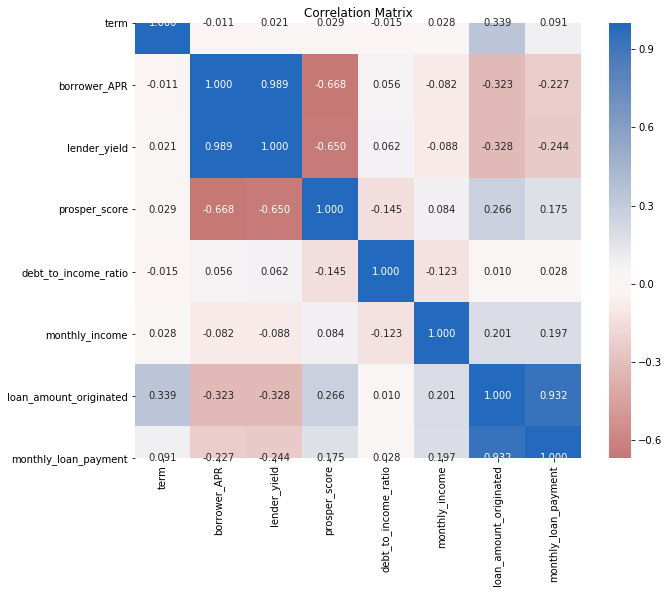

In [438]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [10, 8])
sns.heatmap(df_loans[numeric].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

Based on the correlation matrix above, we will check these relations below: 

1. prosper_score and borrower_APR: Strong negative relationship(-0.668), lower score means higher risks and eventually requires higher interest rates.
2. loan_amount_originated and borrower_APR, Slight negative relationship(-0.323), we may expect that the bigger the loan amount the less the interest rate.

3.  loan_amount_originated and monthly_loan_payment: Strong positive relationship(0.932), the bigger the loan the bigger the monthly payments
4. Borrower_APR and lender_yield: it shows the strong positive relationship(0.989), the higher the rate the higher the lender earns

5. lender_yield and prosper_score: Strong negative relationship(-0.65), higher the score lower interest rate and hence lower lender yield.


We will check these relationships below. 

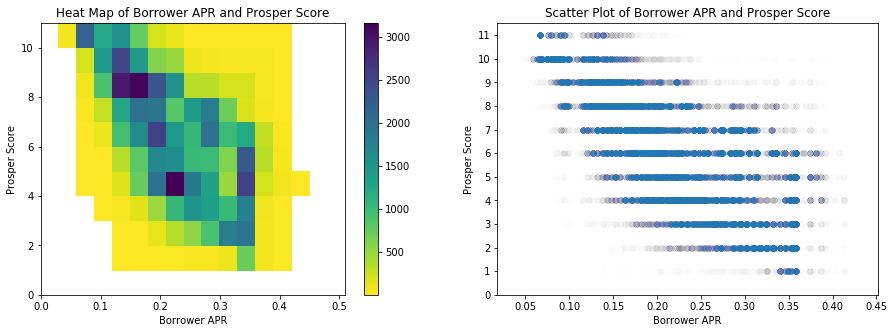

In [439]:
# Relation between prosper_score and borrower_APR
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_loans['borrower_APR'].max()+0.02, 0.03)
bins_y = np.arange(0, df_loans['prosper_score'].max()+1, 1)
plt.hist2d(data = df_loans, x = 'borrower_APR', y = 'prosper_score', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of Borrower APR and Prosper Score')
plt.xlabel('Borrower APR')
plt.ylabel('Prosper Score');

plt.subplot(1, 2, 2)
plt.scatter(data = df_loans, x = 'borrower_APR', y = 'prosper_score', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of Borrower APR and Prosper Score')
plt.xlabel('Borrower APR')
plt.ylabel('Prosper Score');

Comment: As we saw from correlation matrix, the relationship between Borrower APR and Prosper Score shows a negative relationship. The lower Prosper Score leads to the higher borrower rate.

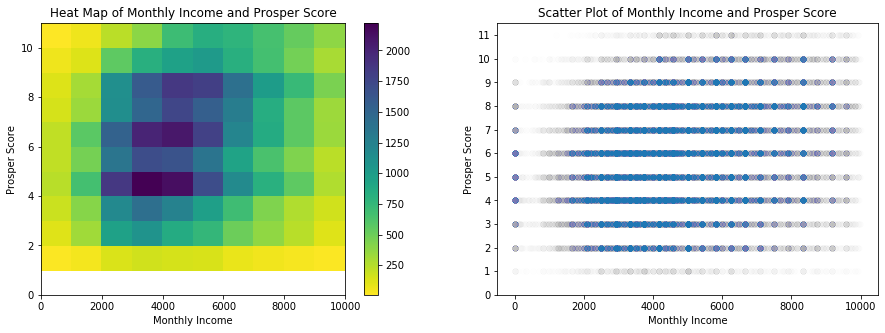

In [380]:
# Relation between prosper_score and monthly_income

df_outlier=df_loans[df_loans['monthly_income'] < 10000]

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_outlier['monthly_income'].max()+1000, 1000)
bins_y = np.arange(0, df_outlier['prosper_score'].max()+1, 1)
plt.hist2d(data = df_outlier, x = 'monthly_income', y = 'prosper_score', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)

plt.colorbar()
plt.title('Heat Map of Monthly Income and Prosper Score')
plt.xlabel('Monthly Income')
plt.ylabel('Prosper Score');

plt.subplot(1, 2, 2)
plt.scatter(data = df_outlier, x = 'monthly_income', y = 'prosper_score', alpha =  0.005)
plt.yticks(np.arange(0, 12, 1))
plt.title('Scatter Plot of Monthly Income and Prosper Score')
plt.xlabel('Monthly Income')
plt.ylabel('Prosper Score');

Commet: On the other hand, Prosper Score is positively related to the monthly income.

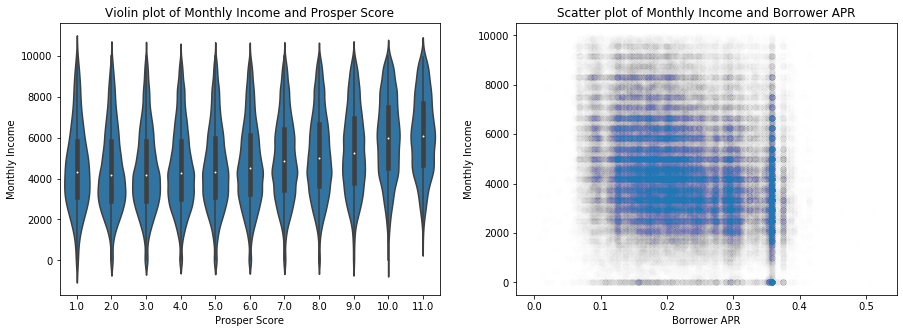

In [379]:
# Relationship between monthly_income and prosper_rating
# Since 75% of the data has monthly_income is less than 6,825, we will plot data under 10,000 range.
df_outlier=df_loans[df_loans['monthly_income'] < 10000]

plt.figure(figsize = [15, 5])
plt.subplot(1, 2, 1)
sns.violinplot(data=df_outlier,x='prosper_score', y='monthly_income',color=base_color);
plt.xlabel('Prosper Score');
plt.ylabel('Monthly Income');
plt.title('Violin plot of Monthly Income and Prosper Score');

plt.subplot(1, 2, 2)
plt.scatter(data=df_outlier,x='borrower_APR', y='monthly_income',color=base_color, alpha =  0.005);
plt.xlabel('Borrower APR');
plt.ylabel('Monthly Income');
plt.title('Scatter plot of Monthly Income and Borrower APR');

On the left, violin plots show that higher prosper scores have higher monthly income.
On the right, scattor plot shows that the higher the income, the lower the borrower APR. 

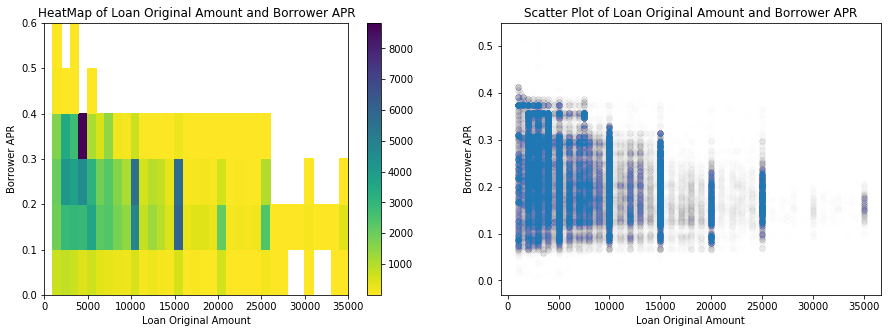

In [383]:
# Relation between prosper_score and monthly_income

plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
bins_x = np.arange(0, df_loans['loan_amount_originated'].max()+1000, 1000)
bins_y = np.arange(0, df_loans['borrower_APR'].max()+0.1, 0.1)
plt.hist2d(data = df_loans, x = 'loan_amount_originated', y = 'borrower_APR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR')
plt.title('HeatMap of Loan Original Amount and Borrower APR')

plt.colorbar()

plt.subplot(1, 2, 2)
plt.scatter(data = df_loans, x = 'loan_amount_originated', y = 'borrower_APR',  alpha =  0.005)
plt.yticks(np.arange(0, 0.6, 0.1))
plt.title('Scatter Plot of Loan Original Amount and Borrower APR')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower APR');

Comment: Both plot shows a negative relationship, which means large loans have relatively less interest rate.

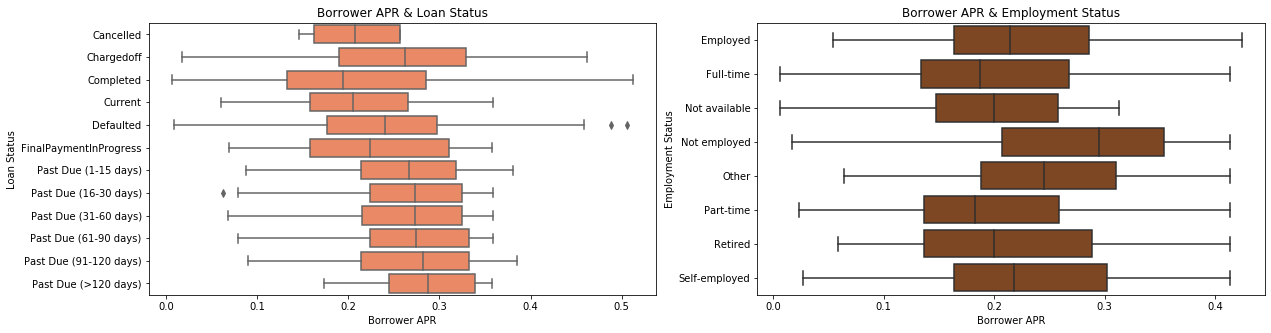

In [387]:
# Borrower APR vs Status of Loan and  Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
sns.boxplot(data=df_loans,x='borrower_APR',y='loan_status',color='coral');
plt.xlabel('Borrower APR');
plt.ylabel('Loan Status');
plt.title('Borrower APR & Loan Status');

plt.subplot(1, 2, 2)
sns.boxplot(data=df_loans,x='borrower_APR',y='employment_status',color='saddlebrown');
plt.xlabel('Borrower APR');
plt.ylabel('Employment Status');
plt.title('Borrower APR & Employment Status');

Comment: On the left, Current and completed loans have lower rate than the past-due loans. And on the right side, Employed people have lower rates than not employed.

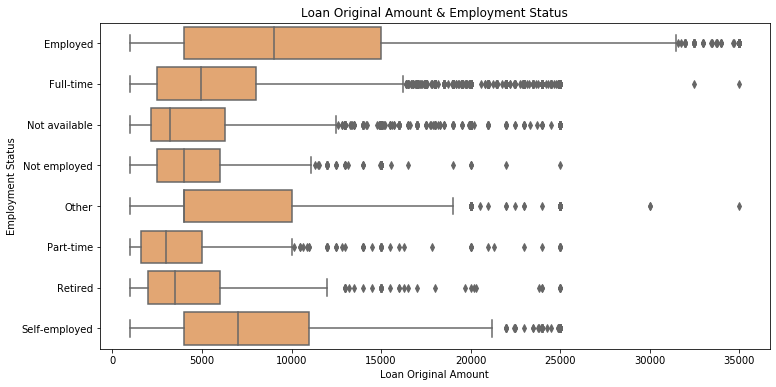

In [388]:
plt.figure(figsize = [12, 6])
sns.boxplot(data=df_loans,x='loan_amount_originated',y='employment_status',color='sandybrown');
plt.xlabel('Loan Original Amount');
plt.ylabel('Employment Status');
plt.title('Loan Original Amount & Employment Status');

Comment: Employed people can have much larger loan amounts compared to all other categories.

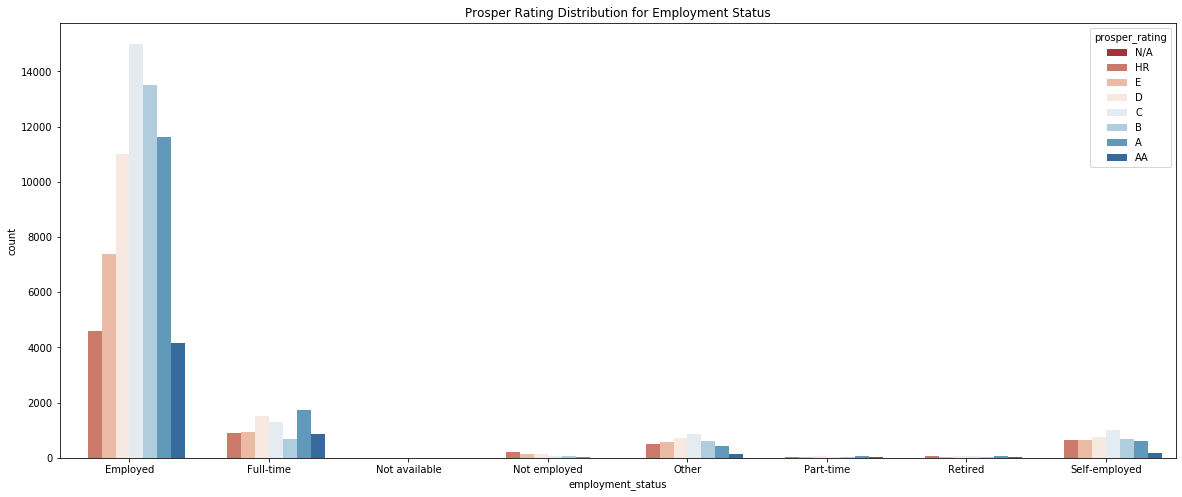

In [389]:
plt.figure(figsize = [20, 8])
sns.countplot(data = df_loans, x = 'employment_status', hue = 'prosper_rating', palette='RdBu')
plt.title('Prosper Rating Distribution for Employment Status');

Comment: Employed people get rating C rating or above, while Not Employed recieve mostly HR rating. HR means High Risk. It supports the assumption that it is difficult to take a loan when people do not have jobs. 

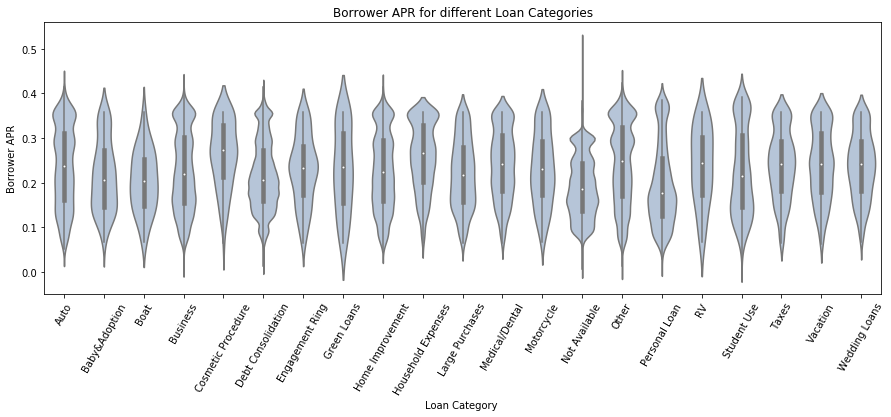

In [392]:
plt.figure(figsize = [15, 5])
sns.violinplot(data=df_loans,x='listing_category', y='borrower_APR',color='lightsteelblue');
plt.xlabel('Loan Category ');
plt.ylabel('Borrower APR');
plt.title('Borrower APR for different Loan Categories')
plt.xticks(rotation=60);

Comment: We can notice that Cosmetic Procedure are mostly given higer interest rates.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Those relationships above show the profile of borrowers and eventually affects to outcome of the loan.
- Employment Status and Monthly Income affect both of the main loan features. (Borrower APR and Prosper Score)
- Unemployed people receive low prosper rating and high interest rate compared to the employed. 
- The higher the income, the higher the score and the lower the interest rates.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - Employment Status has a relationship with Prosper Rating where the unemployed are mostly given a High Risk rating.
- Number of Defaulted loans for the self-employed people are larger than the unemployed.

## Multivariate Exploration

> There are datasets where Employment Status is Not Available and ProsperScore is NaN, we will consider this in next plots.

In [444]:
df_loans[df_loans['employment_status'] == 'Not available'].head()[['employment_status','prosper_score']]

,employment_status,prosper_score
2,Not available,NaN
17,Not available,NaN
42,Not available,NaN
63,Not available,NaN
76,Not available,NaN


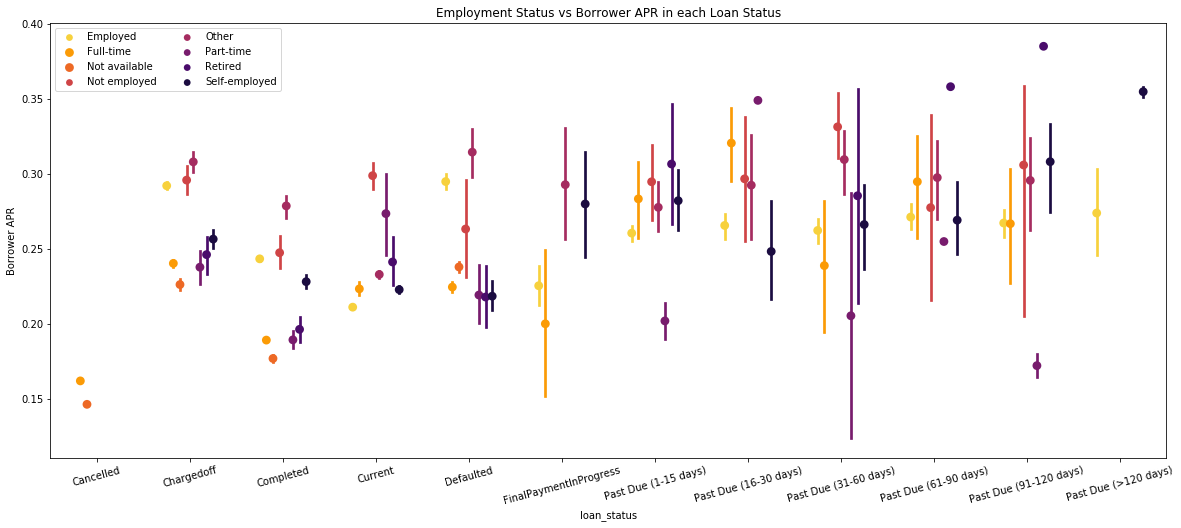

In [443]:
fig = plt.figure(figsize = [20,8])
ax = sns.pointplot(data = df_loans, x = 'loan_status', y = 'borrower_APR', hue = 'employment_status', linestyles = "",
                  dodge = 0.5, palette = 'inferno_r')
plt.title('Employment Status vs Borrower APR in each Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

Comment: Past Due loans generally have higher interest rates in all employment status.

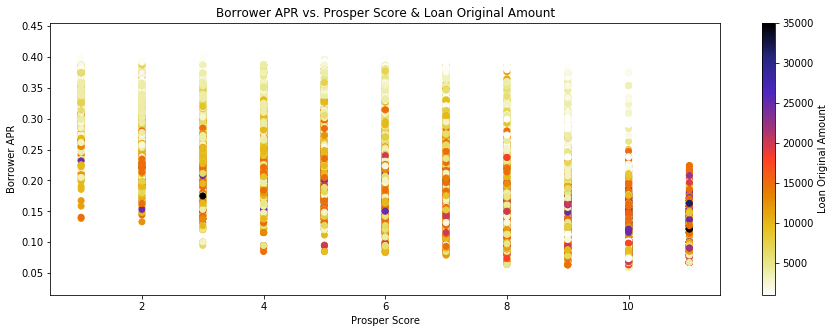

In [402]:
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('CMRmap_r')
plt.scatter(data = df_loans[df_loans['monthly_income'] <20000],\
            x = 'prosper_score', y = 'borrower_APR', c ='loan_amount_originated', cmap=cm) 
plt.colorbar(label = 'Loan Original Amount')
plt.title('Borrower APR vs. Prosper Score & Loan Original Amount')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');

Comment: This plot shows that the negative relationship between prosper_score and borrower_APR we saw previously. On top of that, it shows most loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

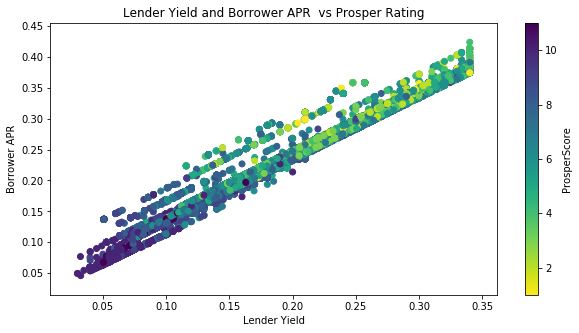

In [403]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df_loans,x='lender_yield',y = 'borrower_APR',c='prosper_score',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('Lender Yield')
plt.ylabel('Borrower APR')
plt.title('Lender Yield and Borrower APR  vs Prosper Rating');

Comment: This plot shows the strong positive relations between Borrower APR and Lender Yield. Besides, it shows that most of loans with lower Borrower APR and Lender Yield have higher ProsperScore and visa-versa.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> We could find the borrower's profile characteristics below:
- Relation between Employment Status, Prosper Score and Borrower APR
- Employed people are diverse regarding the Prosper Score and Borrower APR
- Full-Time and part-time tend to have higher Prosper Score and lower Borrower APR
- Not-Employed & Self-Employed tend to have lower Prosper Score and higher Borrower APR
- Retired people have higher Prosper Score and lower Borrower APR

### Were there any interesting or surprising interactions between features?

> It was important to notice the fact that loans with higher Loan Original Amount are mostly taken by people with higher Prosper Score.